<a href="https://www.kaggle.com/code/zehranurdurmu/elektrikli-arac?scriptVersionId=209158262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv


Veri setimi analiz etmek için gerekli kütüphaneleri yüklüyorum.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Seçtiğim elektrik araç popülasyon verisini notebooka çağırıyorum.

In [3]:
data=pd.read_csv(filepath_or_buffer = "/kaggle/input/electric-vhicule-population-data/Electric_Vehicle_Population_Data.csv")
df=data.copy()


Veri setimin ilk beş verisini inceliyorum.

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


Veri setimin kaç satır ve sütundan oluştuğunu inceliyorum.Veri seti 205.439 satır ve 17 sütundan oluşmaktadır.

In [5]:
df.shape

(205439, 17)

Veri setinin eksik veri içerip içermediğini kontrol ediyorum. Herbir kolon için eksik değer sayısı aşağıdaki gibidir.

In [6]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         8
Base MSRP                                              8
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

Herbir kolondaki eksik değer sayısını da toplayarak toplam eksik değer sayısını elde ediyorum. Toplam 482 eksik verinin 442'si Legislative District'e aitken, 40 veri kalan 16 sütundaki verilere aittir.

In [7]:
df.isna().sum().sum()

482

Veri setim eksik veri içermesine rağmen rastgele eksik veri üreten fonksiyon ile %3 oranında eksik veri üretiyorum.

In [8]:
import pandas as pd
import numpy as np
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.03,
                             seed:random = 50) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df=add_random_missing_values(dataframe=df,missing_rate=0.03)

Herbir sütunun kaç eksik veri içerdiğini görüntülüyorum. Herbir sütun için %3 eksik veri oluştuğunu görüntülüyorum.

In [9]:
df.isna().sum()

VIN (1-10)                                           6035
County                                               5986
City                                                 6043
State                                                6089
Postal Code                                          6064
Model Year                                           6086
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                       6136
Base MSRP                                            6143
Legislative District                                 6552
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Verilerimi analiz edebilmek için veri tiplerini inceliyorum. Object ve Float türünde verilerim olduğunu görüntülüyorum.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         199404 non-null  object 
 1   County                                             199453 non-null  object 
 2   City                                               199396 non-null  object 
 3   State                                              199350 non-null  object 
 4   Postal Code                                        199375 non-null  float64
 5   Model Year                                         199353 non-null  float64
 6   Make                                               199412 non-null  object 
 7   Model                                              199324 non-null  object 
 8   Electric Vehicle Type                              199257 non-null  object

Veri setimde ilgili kolonları ayrı ayrı inceleyerek veri tiplerini anlamaya çalışıyorum.

In [11]:
df['Electric Range']
df['Base MSRP']
df['Legislative District']
df['DOL Vehicle ID']
df['2020 Census Tract']
df['Postal Code'] 
df['Model Year']

0         2023.0
1         2018.0
2         2020.0
3         2014.0
4         2017.0
           ...  
205434    2022.0
205435    2023.0
205436       NaN
205437    2018.0
205438    2023.0
Name: Model Year, Length: 205439, dtype: float64

Postal Code,DOL Vehicle ID ve 2020 Census Tract kolonlarında sayısal işlem yapılamayacağından veri tiplerini objecte çeviriyorum.Tekrar info() ile veri tiplerimin güncel halini görüntülüyorum.

In [12]:
df['Postal Code'] = df['Postal Code'].astype(object)
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].astype(object)
df['2020 Census Tract'] = df['2020 Census Tract'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         199404 non-null  object 
 1   County                                             199453 non-null  object 
 2   City                                               199396 non-null  object 
 3   State                                              199350 non-null  object 
 4   Postal Code                                        199375 non-null  object 
 5   Model Year                                         199353 non-null  float64
 6   Make                                               199412 non-null  object 
 7   Model                                              199324 non-null  object 
 8   Electric Vehicle Type                              199257 non-null  object

Object veri türlerimi kategorik veri olarak bir listede,float verilerimi de numerik veri olarak ayrı bir listede tutuyorum.

In [13]:
categorical_data=[]
numerical_data=[]

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_data.append(col)
    else:
        numerical_data.append(col)
        


Kategorik veri listesini görüntülüyorum. 

In [14]:
categorical_data

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

Numerik veri listesini görüntülüyorum.

In [15]:
numerical_data

['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']

describe() ile sadece numerik verilerin istatistiksel sonuçlarına ulaşabiliriz.

Model Year'ın 199.353 değer içerdiğini, değerlerin ortalamasının 2020.96 olduğunu, standart sapmasının 2.98,en düşük değerinin 1997, en yüksek değerinin 2025 ve çeyreklik değerlerinin sırasıyla 2019,2022 ve 2023,

Electric Range'in 199.303 değer içerdiğini, değerlerin ortalamasının 52,14 olduğunu, standart sapmasının 88.05,en düşük değerinin 0, en yüksek değerinin 337 ve çeyreklik değerlerinin sırasıyla 0,0 ve 48,

Base MSRP'nin 199.296 değer içerdiğini, değerlerin ortalamasının 921.07 olduğunu, standart sapmasının 7764,en düşük değerinin 0, en yüksek değerinin 845.000 ve çeyreklik değerlerinin sırasıyla 0,0 ve 0,

Legislative District'in 198.887 değer içerdiğini, değerlerin ortalamasının 28.97 olduğunu, standart sapmasının 14.90,en düşük değerinin 1, en yüksek değerinin 49  ve çeyreklik değerlerinin sırasıyla 17,33 ve 42 olduğunu görüntülüyorum.



In [16]:
df.describe()

,Model Year,Electric Range,Base MSRP,Legislative District
count,199353.000000,199303.000000,199296.000000,198887.000000
mean,2020.960919,52.149406,921.071421,28.973824
std,2.989005,88.055542,7764.005571,14.907199
min,1997.000000,0.000000,0.000000,1.000000
25%,2019.000000,0.000000,0.000000,17.000000
50%,2022.000000,0.000000,0.000000,33.000000
75%,2023.000000,48.000000,0.000000,42.000000
max,2025.000000,337.000000,845000.000000,49.000000


Numerik veriler için eksik verileri doldurmak istediğimizde aritmetik ortalama, mod ve medyan değerleri önemli ölçütlerdir. Bu değerlere göre veri setinin normal dağılım, pozitif basıklık ya da negatif basıklığa uygun olma durumuna göre aritmetik ortalama ya da medyan değeri ile eksik verileri doldurabiliriz. Bu yüzden numerik verilerim için aritmetik ortalama, medyan ve mod değerlerini hesaplayacağım.mean<medyan<mod ise veri seti negatif basıklığa,mean=medyan=mod ise normal dağılıma,mod<medyan<mean ise pozitif basıklığa uygundur.Negatif ve pozitif basıklık durumunda verilerimi medyanla, normal dağılım durumunda verilerimi aritmetik ortalamayla dolduracağım.

Elektrik range'in eksik verilerini doldurmak için aritmetik ortalama,mod,ve medyan değerlerini inceliyorum. mean=52>mode=0=medyan=0 olduğundan eksik verileri medyan ile doldurmaya karar veriyorum.

In [17]:
print(df['Electric Range'].mean())
print(df['Electric Range'].mode())
print(df['Electric Range'].median())

52.149405678790586
0    0.0
Name: Electric Range, dtype: float64
0.0


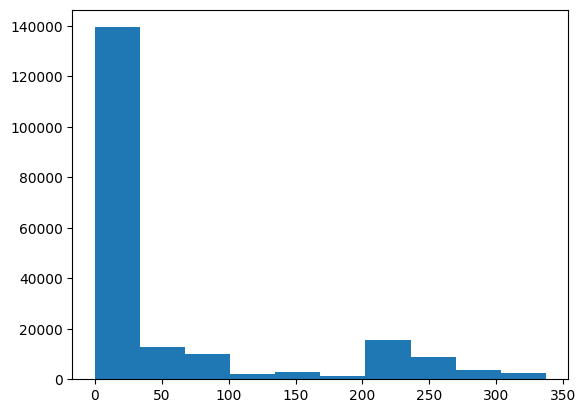

In [18]:
plt.hist(df['Electric Range'])
plt.show()

In [19]:
df_=df.copy()

Electric Range 'deki eksik verileri medyanla doldurduktan sonra eksik veri sayısına tekrar bakıp bu kolona ait hiç eksik veri kalmadığını görüyorum.

In [20]:
median_er=df_['Electric Range'].median()
df_['Electric Range'].fillna(value=median_er,inplace=True)
df_.isna().sum()

/tmp/ipykernel_17/342519448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Electric Range'].fillna(value=median_er,inplace=True)


VIN (1-10)                                           6035
County                                               5986
City                                                 6043
State                                                6089
Postal Code                                          6064
Model Year                                           6086
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                            6143
Legislative District                                 6552
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Model Year'ın eksik verilerini doldurmak için aritmetik ortalama,mod,ve medyan değerlerini inceliyorum. mean=2020<medyan=2022<mod=2023 olduğundan eksik verileri medyan ile doldurmaya karar veriyorum.

In [21]:
print(df['Model Year'].mean())
print(df['Model Year'].mode())
print(df['Model Year'].median())

2020.960918571579
0    2023.0
Name: Model Year, dtype: float64
2022.0


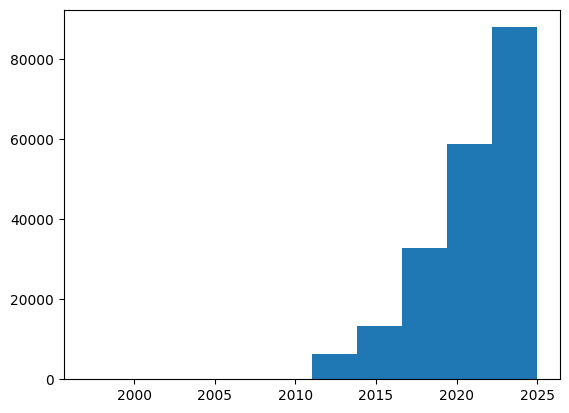

In [22]:
plt.hist(df['Model Year'])
plt.show()

Model Year'deki eksik verileri medyanla doldurduktan sonra eksik veri sayısına tekrar bakıp bu kolona ait hiç eksik veri kalmadığını görüyorum.

In [23]:
median_my=df_['Model Year'].median()
df_['Model Year'].fillna(value=median_my,inplace=True)
df_.isna().sum()

/tmp/ipykernel_17/2132311636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Model Year'].fillna(value=median_my,inplace=True)


VIN (1-10)                                           6035
County                                               5986
City                                                 6043
State                                                6089
Postal Code                                          6064
Model Year                                              0
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                            6143
Legislative District                                 6552
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Base MSRP'nin eksik verilerini doldurmak için aritmetik ortalama,mod,ve medyan değerlerini inceliyorum. mode=0=medyan=0<mean=921 olduğundan eksik verileri medyan ile doldurmaya karar veriyorum.

In [24]:
print(df['Base MSRP'].mean())
print(df['Base MSRP'].mode())
print(df['Base MSRP'].median())

921.0714214033397
0    0.0
Name: Base MSRP, dtype: float64
0.0


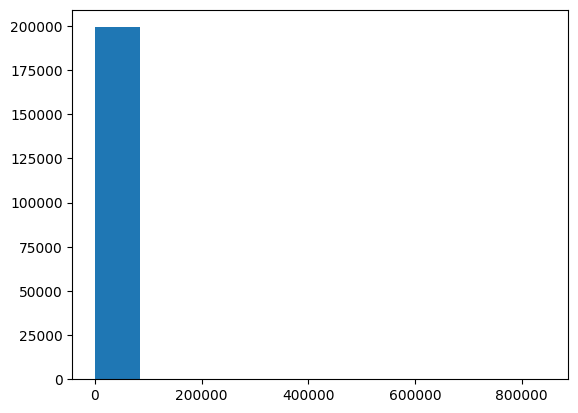

In [25]:
plt.hist(df['Base MSRP'])
plt.show()

Base MSRP'ddeki eksik verileri medyanla doldurduktan sonra eksik veri sayısına tekrar bakıp bu kolona ait hiç eksik veri kalmadığını görüyorum.

In [26]:
median_my=df_['Base MSRP'].median()
df_['Base MSRP'].fillna(value=median_my,inplace=True)
df_.isna().sum()

/tmp/ipykernel_17/603636828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Base MSRP'].fillna(value=median_my,inplace=True)


VIN (1-10)                                           6035
County                                               5986
City                                                 6043
State                                                6089
Postal Code                                          6064
Model Year                                              0
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                               0
Legislative District                                 6552
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Legislative District'in eksik verilerini doldurmak için aritmetik ortalama,mod,ve medyan değerlerini inceliyorum. mean=28.97<medyan=33<mod=41 olduğundan eksik verileri medyan ile doldurmaya karar veriyorum.

In [27]:
print(df['Legislative District'].mean())
print(df['Legislative District'].mode())
print(df['Legislative District'].median())

28.973824332409862
0    41.0
Name: Legislative District, dtype: float64
33.0


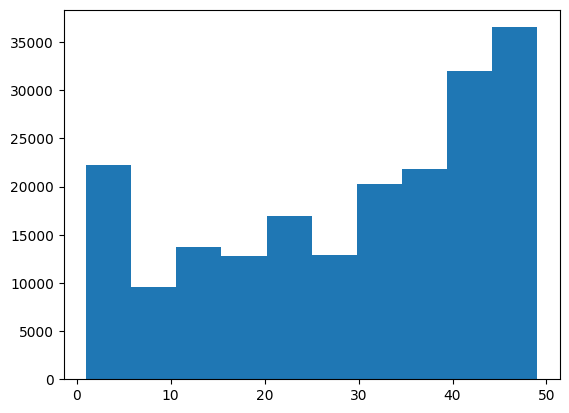

In [28]:
plt.hist(df['Legislative District'])
plt.show()

Legislative District'teki eksik verileri medyanla doldurduktan sonra eksik veri sayısına tekrar bakıp bu kolona ait hiç eksik veri kalmadığını görüyorum.

In [29]:
median_my=df_['Legislative District'].median()
df_['Legislative District'].fillna(value=median_my,inplace=True)
df_.isna().sum()

/tmp/ipykernel_17/1728247912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Legislative District'].fillna(value=median_my,inplace=True)


VIN (1-10)                                           6035
County                                               5986
City                                                 6043
State                                                6089
Postal Code                                          6064
Model Year                                              0
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Kategorik değişkenlerimi doldurmak için veri setimi analiz ettiğimde genellikle değişkenlerin birbiriyle bağlantılı olduğunu gördüm. Bu yüzden çoğu değişken için gruplama yardımıyla verilerimi doldurmanın daha doğru olduğuna karar verdim.1 değişken için mod yardımıyla verilerimi doldurdum. VIN, DOL Vehicle ID ve 2020 Census Tract sütunları da benzersiz değerler içermesi gerektiğinden herhangi bir işlem yapmadım.

County kolonu için eksik veri sayısını görüntülüyorum.

In [30]:
df_['County'].isna().sum()   

5986

County sütununu mod ile doldursaydım en çok tekrar eden ülke ile boş verilerim dolacaktı. Ancak bu durum yanlış veriler elde etmeme sebep olabilirdi. Örneğin herhangi bir satırda doldurduğum ülkenin şehir verisi dolu olabilir ve bu şehir benim doldurduğumdan farklı bir ülkeye ait olabilirdi.
Bu durumu engellemek için City kolonundaki verileri gruplayıp her City'deki en çok tekrar eden 'County'  değeri ile 'County'deki eksik verilerimi dolduruyorum. Zaten her şehir için doğru bir ülke olduğundan ülke değerleri o değer ile dolacak.

In [31]:
df_['County']=df_['County'].fillna(df_.groupby('City')['County'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_['County'].isna().sum()                        

179

County deki eksik verileri doldurdu.Ancak 179 veri hala boş. Bunun sebebi ise 179 verinin şehir değerleri de boş olduğundan onlara bakarak ülke değerlerini dolduramadı.

In [32]:
df_[df_[['County','City']].isna().all(axis=1)][['County','City']]
df_.isna().sum() 


VIN (1-10)                                           6035
County                                                179
City                                                 6043
State                                                6089
Postal Code                                          6064
Model Year                                              0
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

County kolonundaki verileri gruplayıp her County'deki en çok tekrar eden 'City' değeri ile City'deki eksik verilerimi dolduruyorum. Burada her ülkeye ait birden fazla şehir olabilir. Her ülkedeki en çok tekrar eden şehri bulup eksik şehir değerlerine bu değeri atar. Eksik verileri doldurduktan sonra eksik veri sayımın 178'e düştüğünü görüyorum.

In [33]:
df_['City']=df_['City'].fillna(df_.groupby('County')['City'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_.isna().sum() 

VIN (1-10)                                           6035
County                                                179
City                                                  178
State                                                6089
Postal Code                                          6064
Model Year                                              0
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

City kolonundaki verileri gruplayıp her City'deki en çok tekrar eden 'State' değeri ile State'deki eksik verilerimi dolduruyorum. Burada her şehre ait bir eyalet olacağından boş eyalet değerlerini o şehre ait eyalet değeriyle dolduracaktır.Sonuç olarak State deki eksik değer sayımın 11'e düştüğünü görüyorum.

In [34]:
df_['State']=df_['State'].fillna(df_.groupby('City')['State'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_.isna().sum() 

VIN (1-10)                                           6035
County                                                179
City                                                  178
State                                                  11
Postal Code                                          6064
Model Year                                              0
Make                                                 6027
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Model kolonundaki verileri gruplayıp Model'deki en çok tekrar eden Make değeri ile Make'deki eksik verilerimi dolduruyorum. Burada her modele ait bir make(marka) vardır. Marka kolonundaki eksik değerler için modele bakacak ve o model hangi markaya aitse o markayı getirecek.Bu durumda Make kolonu için eksik veri sayısı 185'düşmüştür.

In [35]:
df_['Make']=df_['Make'].fillna(df_.groupby('Model')['Make'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_['Make']
df_.isna().sum()

VIN (1-10)                                           6035
County                                                179
City                                                  178
State                                                  11
Postal Code                                          6064
Model Year                                              0
Make                                                  185
Model                                                6115
Electric Vehicle Type                                6182
Clean Alternative Fuel Vehicle (CAFV) Eligibility    6097
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

Make kolonundaki verileri gruplayıp her Make'teki en çok tekrar eden 'Model' değeri ile Model'deki eksik verilerimi dolduruyorum. Burada her Make(Marka)'ya ait birden fazla model olabilir. Her markadaki en çok tekrar eden modeli bulup eksik model değerlerine bu değeri atar. Eksik verileri doldurduktan sonra model kolonu için eksik veri sayımın 184'e düştüğünü görüyorum.

In [36]:
df_['Model']=df_['Model'].fillna(df_.groupby('Make')['Model'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_['Model'].isna().sum()

184

Model kolonundaki verileri gruplayıp her modeldeki en çok tekrar eden Electric Vehicle Type değeri ile Electric Vehicle Type'deki eksik verilerimi dolduruyorum. Burada her model'e ait birden fazla Electric Vehicle Type olabilir. Her modeldeki en çok tekrar ede elektrik araç tipinini bulup elektrik araç tipi değerlerine bu değeri atar. Eksik verileri doldurduktan sonra elektrik araç tipi kolonu için eksik veri sayımın 44'e düştüğünü görüyorum.

In [37]:
df_['Electric Vehicle Type']=df_['Electric Vehicle Type'].fillna(df_.groupby('Model')['Electric Vehicle Type'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_['Electric Vehicle Type'].isna().sum()

4

Clean Alternative Fuel Vehicle (CAFV) Eligibility kolonum için 3 farklı değerim var.Eksik verilerimi bu değerlerden en çok tekrar eden ile dolduruyorum.Bu kolon  için herhangi bir eksik değerim kalmıyor.

In [38]:
cafv_mod=df_['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].mode()
df_['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=df_['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna(value=cafv_mod[0])
df_.isna().sum()

VIN (1-10)                                           6035
County                                                179
City                                                  178
State                                                  11
Postal Code                                          6064
Model Year                                              0
Make                                                  185
Model                                                 184
Electric Vehicle Type                                   4
Clean Alternative Fuel Vehicle (CAFV) Eligibility       0
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                     5927
Electric Utility                                     6101
2020 Census Tract                                    5888
dtype: int64

County'e göre gruplama yaparak 'Vehicle Location' kolonundaki eksik verilerimi dolduruyorum. Bu kolondaki eksik veri sayısa 6'ya düşmüştür.

In [39]:
df_['Vehicle Location']=df_['Vehicle Location'].fillna(df_.groupby('County')['Vehicle Location'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_['Vehicle Location'].isna().sum()

6

City'e göre gruplama yaparak 'Electric Utility' kolonundaki eksik verilerimi dolduruyorum. Bu kolondaki eksik veri sayısa 20'ye düşmüştür.

In [40]:
df_['Electric Utility']=df_['Electric Utility'].fillna(df_.groupby('City')['Electric Utility'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_.isna().sum()

VIN (1-10)                                           6035
County                                                179
City                                                  178
State                                                  11
Postal Code                                          6064
Model Year                                              0
Make                                                  185
Model                                                 184
Electric Vehicle Type                                   4
Clean Alternative Fuel Vehicle (CAFV) Eligibility       0
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                        6
Electric Utility                                       20
2020 Census Tract                                    5888
dtype: int64

City'e göre gruplama yaparak 'Postal Code' kolonundaki eksik verilerimi dolduruyorum. Bu kolondaki eksik veri sayısa 17'ye düşmüştür.

In [41]:
df_['Postal Code']=df_['Postal Code'].fillna(df_.groupby('City')['Postal Code'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))
df_.isna().sum()

/tmp/ipykernel_17/2529711844.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_['Postal Code']=df_['Postal Code'].fillna(df_.groupby('City')['Postal Code'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))


VIN (1-10)                                           6035
County                                                179
City                                                  178
State                                                  11
Postal Code                                            17
Model Year                                              0
Make                                                  185
Model                                                 184
Electric Vehicle Type                                   4
Clean Alternative Fuel Vehicle (CAFV) Eligibility       0
Electric Range                                          0
Base MSRP                                               0
Legislative District                                    0
DOL Vehicle ID                                       6201
Vehicle Location                                        6
Electric Utility                                       20
2020 Census Tract                                    5888
dtype: int64

In [42]:
df_.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,53035091301.0
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,53035080700.0
2,5YJ3E1EA4L,King,Seattle,WA,98115.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007302.0
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000700.0
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,238.0,0.0,20.0,NaN,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,53067012510.0
5,5YJYGDEE5L,Snohomish,Lynnwood,WA,98036.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,21.0,124511187.0,POINT (-122.287143 47.812199),PUGET SOUND ENERGY INC,53061051922.0
6,KM8S6DA23N,Kitsap,Poulsbo,WA,98370.0,2022.0,HYUNDAI,SANTA FE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,31.0,0.0,23.0,212217764.0,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,53035091100.0
7,7FCTGAAA1P,Snohomish,Arlington,WA,98223.0,2023.0,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,252414039.0,POINT (-122.11597 48.194109),PUGET SOUND ENERGY INC,53061053507.0
8,5YJYGDEE9L,King,Kent,WA,98031.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,0.0,33.0,112668510.0,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033029405.0
9,1N4AZ0CP2F,King,Kirkland,WA,98034.0,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,45.0,109765204.0,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033021904.0


Herbir kolon için eksik olmayan veri sayısı aşağıdaki gibidir:

In [43]:
df_.notnull().sum()

VIN (1-10)                                           199404
County                                               205260
City                                                 205261
State                                                205428
Postal Code                                          205422
Model Year                                           205439
Make                                                 205254
Model                                                205255
Electric Vehicle Type                                205435
Clean Alternative Fuel Vehicle (CAFV) Eligibility    205439
Electric Range                                       205439
Base MSRP                                            205439
Legislative District                                 205439
DOL Vehicle ID                                       199238
Vehicle Location                                     205433
Electric Utility                                     205419
2020 Census Tract                       

In [44]:
dfr=df_.copy()

In [45]:
df_categorical=dfr.select_dtypes(include='object')
df_categorical.head()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,53035091301.0
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,53035080700.0
2,5YJ3E1EA4L,King,Seattle,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007302.0
3,1N4AZ0CP8E,King,Seattle,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000700.0
4,1G1FX6S00H,Thurston,Yelm,WA,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,53067012510.0


County kolonundaki benzersiz değerleri görüntülüyorum.

In [46]:
df_categorical['County'].unique()

array(['Kitsap', 'King', 'Thurston', 'Snohomish', 'Yakima', 'Island',
       'Skagit', 'Spokane', 'Clallam', 'Chelan', 'Walla Walla',
       'Kittitas', 'Whitman', 'Stevens', 'Grant', 'Douglas', 'Clark',
       'Cowlitz', 'Jefferson', nan, 'Klickitat', 'Pierce', 'Franklin',
       'Whatcom', 'San Juan', 'Columbia', 'Grays Harbor', 'Lewis',
       'Benton', 'Pacific', 'Mason', 'Platte', 'Monterey', 'Wahkiakum',
       'Norfolk', 'Okanogan', 'Cumberland', 'Skamania', "Prince George's",
       'Garfield', 'Pend Oreille', 'Asotin', 'Lincoln', 'Adams',
       'San Diego', 'Oldham', 'York', 'Orange', 'Wake', 'Los Angeles',
       'Sonoma', 'Ferry', 'Churchill', 'DeKalb', 'Goochland', 'Stafford',
       'Contra Costa', 'Riverside', 'Loudoun', 'Allen', 'James City',
       'Anne Arundel', 'Madison', 'Isle of Wight', 'Leavenworth',
       'Charles', 'Sarpy', 'Kings', 'Ventura', 'San Mateo', 'Sacramento',
       'Maui', 'Ada', 'Mobile', 'District of Columbia', 'New York',
       'Multnomah', 'Fa

State kolonundaki benzersiz değerleri görüntülüyorum.

In [47]:
df_categorical['State'].unique()

array(['WA', nan, 'MO', 'CA', 'VA', 'NC', 'MD', 'KY', 'NV', 'GA', 'PA',
       'IN', 'NE', 'IL', 'KS', 'NY', 'HI', 'AE', 'ID', 'AL', 'DC', 'OR',
       'TX', 'AZ', 'FL', 'NM', 'SC', 'OH', 'NJ', 'MI', 'IA', 'RI', 'WY',
       'UT', 'DE', 'CO', 'MA', 'AR', 'AK', 'MN', 'LA', 'CT', 'NH', 'WI',
       'BC', 'OK'], dtype=object)

Make kolonundaki benzersizdeğerleri görüntülüyorum.

In [48]:
df_categorical['Make'].unique()

array(['TOYOTA', 'NISSAN', 'TESLA', 'CHEVROLET', 'HYUNDAI', 'RIVIAN',
       'FORD', 'KIA', 'AUDI', 'DODGE', 'BMW', 'VOLKSWAGEN', 'MITSUBISHI',
       'VOLVO', 'FIAT', 'MAZDA', 'MINI', 'LINCOLN', 'MERCEDES-BENZ',
       'PORSCHE', 'JAGUAR', 'LEXUS', 'JEEP', 'CHRYSLER', 'HONDA',
       'GENESIS', nan, 'POLESTAR', 'SUBARU', 'CADILLAC', 'SMART',
       'FISKER', 'LUCID', 'ACURA', 'GMC', 'ALFA ROMEO', 'LAND ROVER',
       'TH!NK', 'BENTLEY', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS',
       'ROLLS-ROYCE', 'RAM'], dtype=object)

Electric Vehicle Type kolonundaki benzersiz değerleri görüntülüyorum.

In [49]:
df_categorical['Electric Vehicle Type'].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)', nan], dtype=object)

 Clean Alternative Fuel Vehicle (CAFV) Eligibility kolonundaki benzersiz değerleri görüntülüyorum.

In [50]:
df_categorical['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [51]:
df_categorical['Make'].value_counts()

Make
TESLA                   90231
CHEVROLET               15098
NISSAN                  14512
FORD                    10835
KIA                      9097
BMW                      8478
TOYOTA                   7934
HYUNDAI                  5779
RIVIAN                   5675
VOLKSWAGEN               5632
JEEP                     5411
VOLVO                    4871
AUDI                     3916
CHRYSLER                 3687
MERCEDES-BENZ            1929
SUBARU                   1237
PORSCHE                  1229
POLESTAR                 1161
HONDA                    1077
MITSUBISHI               1018
MINI                     1014
FIAT                      799
LEXUS                     753
CADILLAC                  744
MAZDA                     709
DODGE                     665
LINCOLN                   299
LUCID                     289
GENESIS                   266
SMART                     248
JAGUAR                    242
FISKER                    186
ALFA ROMEO                 77
LAND 

Electric Vehicle Type'ın değer sayısını inceliyorum. BEV ve PHEV olmak üzere 2 tip elektrikli araç vardır. Battery Electric Vehicle (BEV), tamamen elektrikle çalışan araçları ifade eder ve veri setimdeki araçların 161.554 adeti BEV tipindedir.Plug-in Hybrid Electric Vehicle (PHEV),hem bir içten yanmalı motor (ICE) hem de bir elektrik motoru içeren ve bataryası harici bir güç kaynağıyla şarj edilebilen hibrit araçları ifade eder ve veri setimdeki araçların 43.881 adeti PHEV tipindedir.

In [52]:
df_categorical['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            161554
Plug-in Hybrid Electric Vehicle (PHEV)     43881
Name: count, dtype: int64

Clean Alternative Fuel Vehicle (CAFV) Eligibility'ın değer sayısını inceliyorum. **Veri setimdeki  67.867 adet veri Clean Alternative Fuel Vehicle (CAFV) Eligible'dir.** Clean Alternative Fuel Vehicle (CAFV) Eligible, bir aracın çevre dostu, temiz alternatif yakıtlarla çalışmaya uygun olduğunu ifade eder. **Veri setimdeki 20.632 adet veri Not eligible due to low battery range'dir**."Not eligible due to low battery range", bir aracın belirli bir program, teşvik veya uygunluk standardı için gerekli olan minimum batarya menziline sahip olmadığını ifade eder. **Veri setimdeki  116.940 adet veri Eligibility unknown as battery range has not been researched.**"Eligibility unknown as battery range has not been researched" ifadesi, bir aracın batarya menzilinin henüz belirlenmediği veya test edilmediği anlamına gelir. Bu, aracın bir teşvik programına veya uygunluk standardına dahil edilip edilemeyeceğini netleştirememe durumunu ifade eder. 

In [53]:
df_categorical['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    116940
Clean Alternative Fuel Vehicle Eligible                          67867
Not eligible due to low battery range                            20632
Name: count, dtype: int64

Elektrikli araç markalarının veri sayıları barchart ile görüntülüyorum.

<Axes: ylabel='Make'>

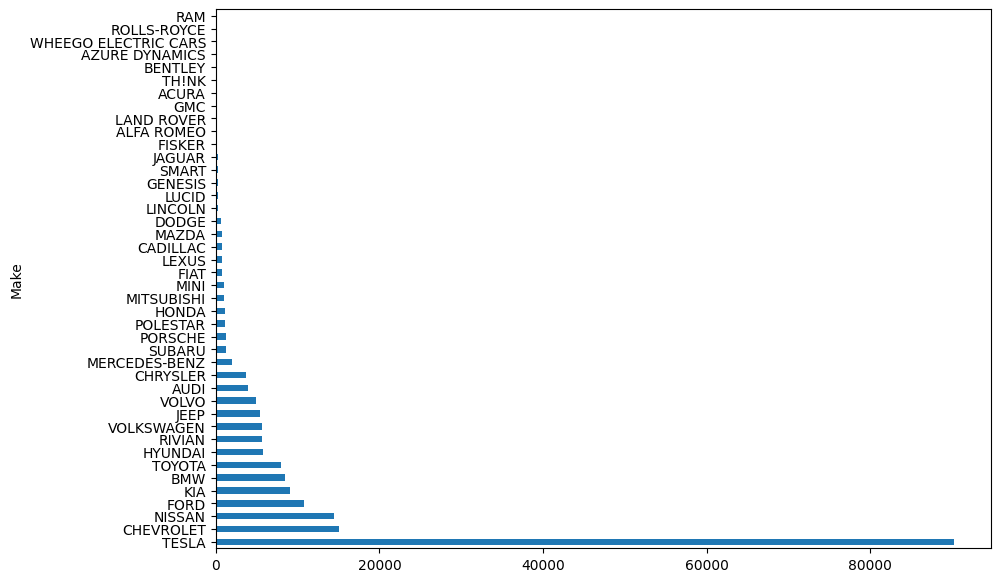

In [54]:
plt.figure(figsize=(10, 7)) 
df_categorical['Make'].value_counts().plot.barh()

Elektrikli araç modellerinin veri sayıları barchart ile görüntülüyorum. En fazla veriye sahip modeller sırasıyla Model Y, Model 3, Leaf,Model S, Bolt EV şeklindedir.

<Axes: ylabel='Model'>

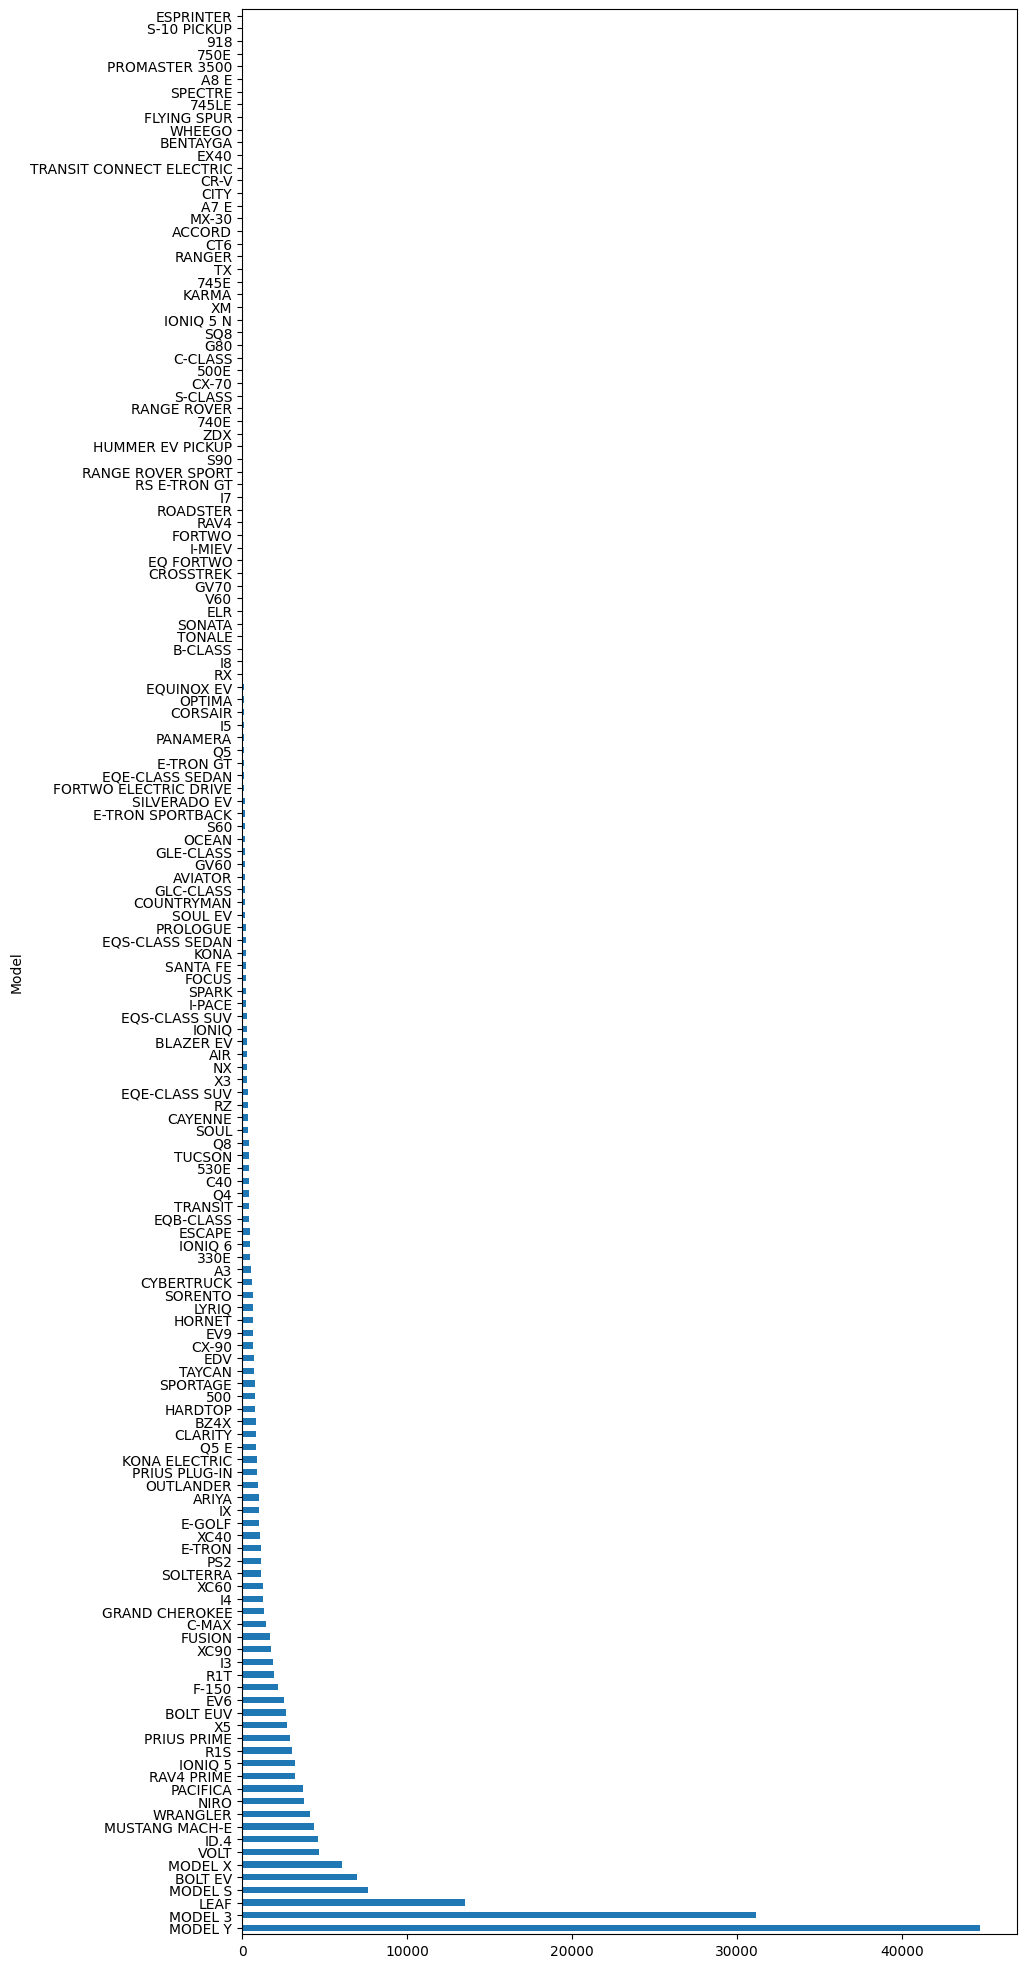

In [55]:
plt.figure(figsize=(10,25)) 
df_categorical['Model'].value_counts().plot.barh()

Ülkelerin veri sayılarını barchart ile görüntülüyorum. En fazla veriye sahip Ülkeler sırasıyla King, Snohomish, Pierce,Clark, Thurston şeklindedir.

<Axes: ylabel='County'>

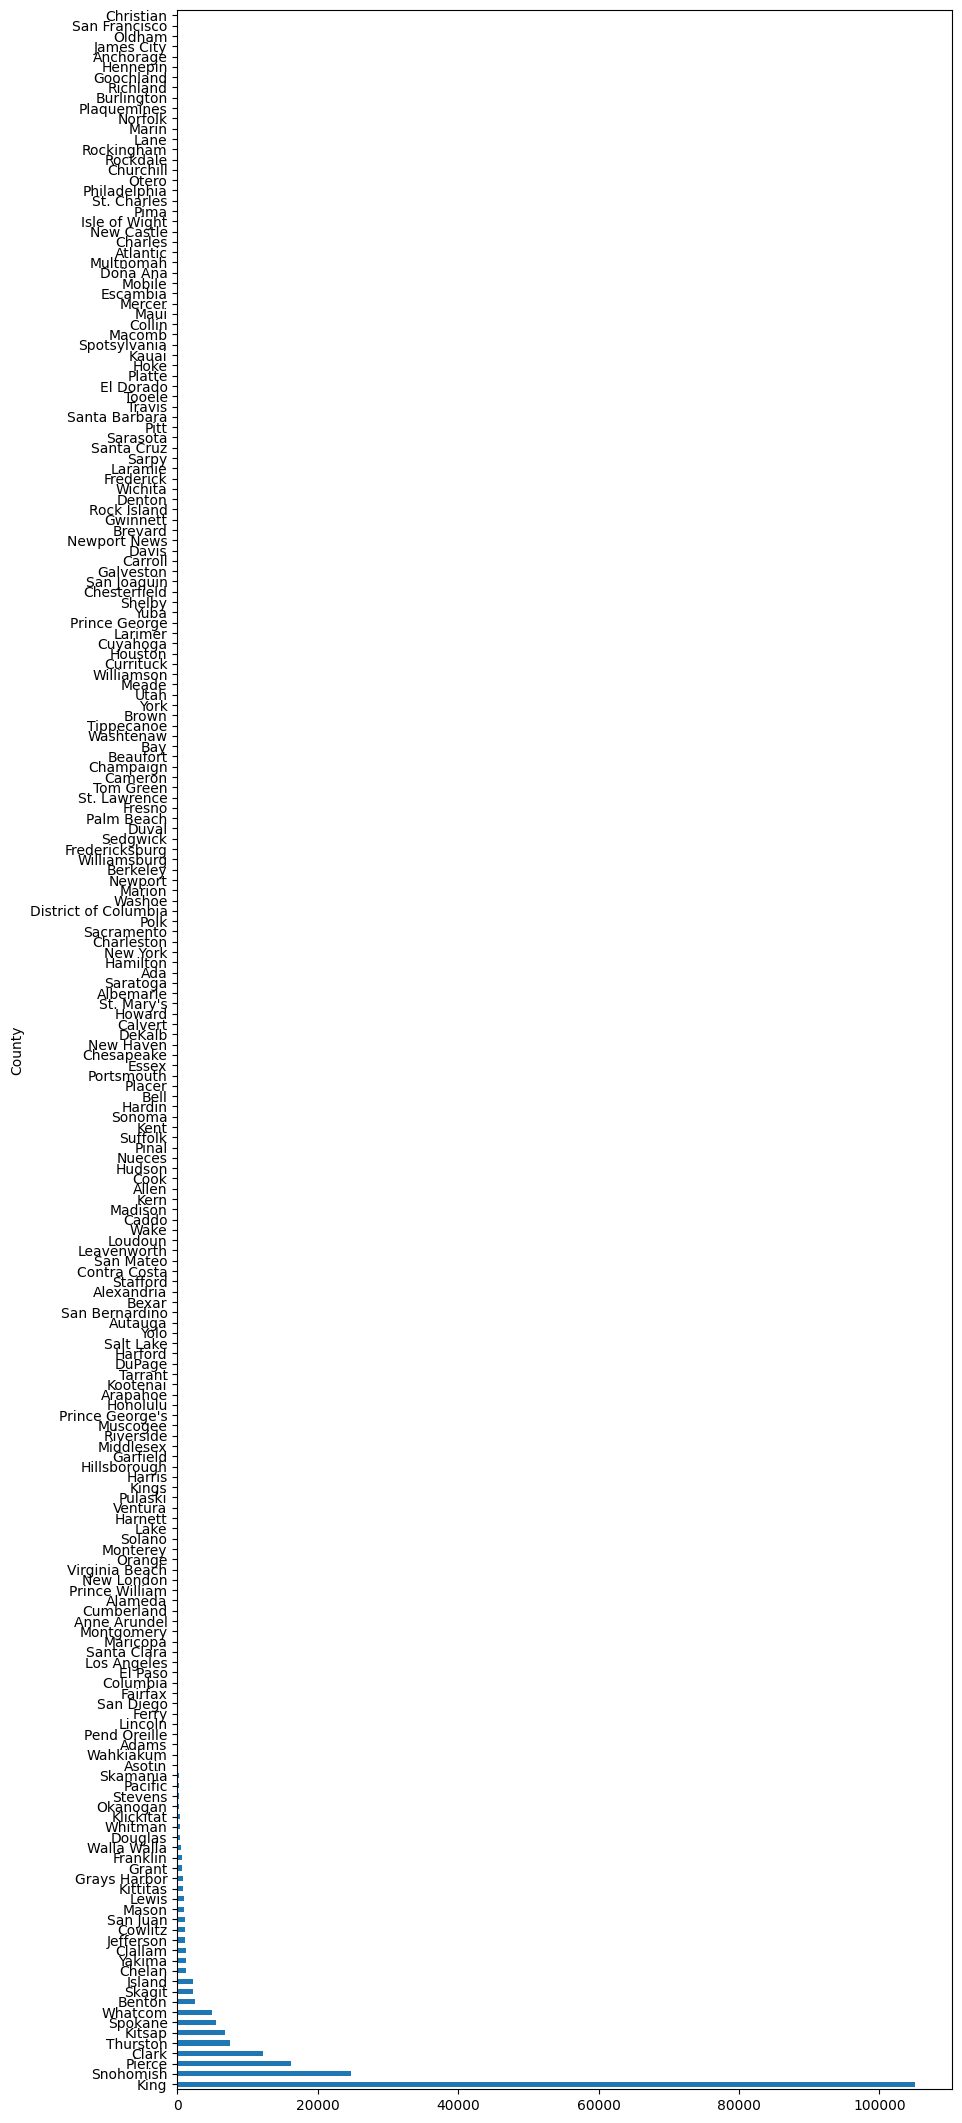

In [56]:
plt.figure(figsize=(10,27)) 
df_categorical['County'].value_counts().plot.barh()

Marka bazında elektrik menzilinin( bir elektrikli veya hibrit aracın bataryası tamamen şarj edildiğinde yalnızca elektrik gücüyle kat edebileceği maksimum mesafe) ortalama olarak en yüksek 196.28 ile Jaguar'da olduğu görülmektedir.

In [57]:
df_er=dfr.groupby(by=['Make'])['Electric Range'].mean().to_frame().reset_index().sort_values(by='Electric Range',ascending=False)
df_er

,Make,Electric Range
17,JAGUAR,196.289256
41,WHEEGO ELECTRIC CARS,100.000000
37,TH!NK,100.000000
7,CHEVROLET,88.255398
10,FIAT,80.793492
28,NISSAN,73.792172
36,TESLA,66.157241
34,SMART,58.225806
3,AZURE DYNAMICS,56.000000
2,AUDI,45.763023


<Axes: xlabel='Make', ylabel='Electric Range'>

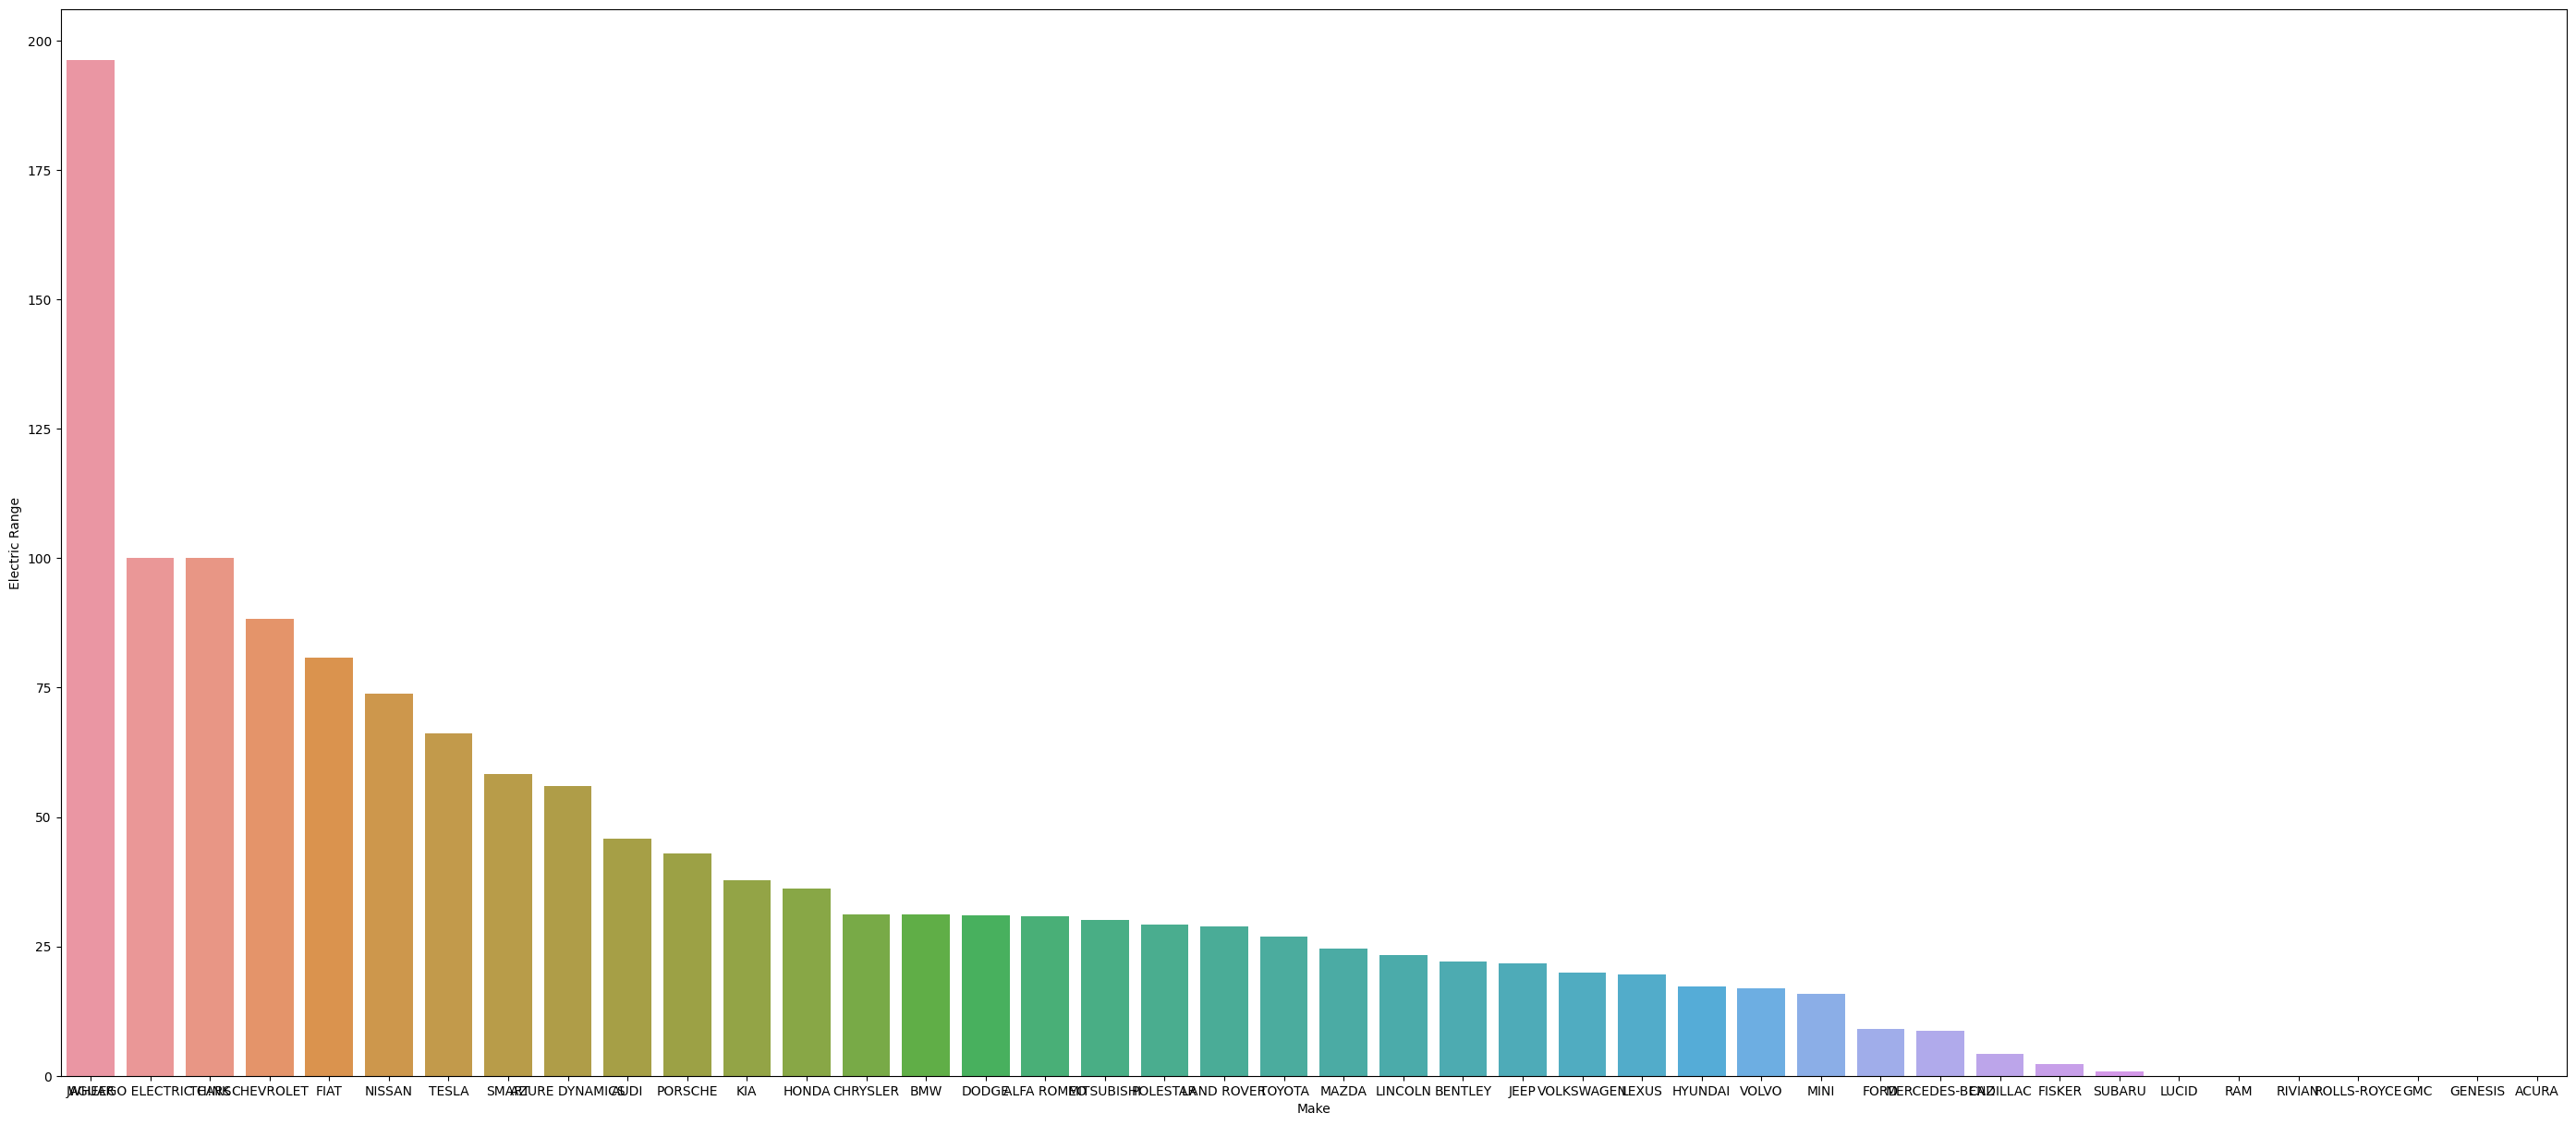

In [58]:
plt.figure(figsize=(35,15)) 
sns.barplot(data=df_er,x='Make',y='Electric Range')

Elektrik menzilini hem marka hem model bazında incelediğimizde sırasıyla 249.82 ile Hyundai'nin Kona modeli,224.46 ile Tesla'nın Roadster'i,196.28 ile Jaguar'ın I-Pace'inin en yüksek olduğunu görüyoruz.

In [59]:
df_er_2=dfr.groupby(by=['Make','Model'])['Electric Range'].mean().to_frame().reset_index().sort_values(by='Electric Range',ascending=False)
df_er_2

,Make,Model,Electric Range
69,HYUNDAI,KONA,249.828054
133,TESLA,ROADSTER,224.468085
74,JAGUAR,I-PACE,196.289256
130,TESLA,MODEL S,167.840686
37,CHEVROLET,BOLT EV,159.125844
...,...,...,...
104,MERCEDES-BENZ,ESPRINTER,0.000000
26,BMW,I7,0.000000
25,BMW,I5,0.000000
112,NISSAN,ARIYA,0.000000


Çok fazla kırılım olduğu için görselleştirmeyi kolaylaştırmak için oluşturduğum veri setinin ilk 20 verisini alıp görselleştiriyorum.

In [60]:
df_er2 = df_er_2.iloc[:19,:]  
print(df_er2)

                     Make             Model  Electric Range
69                HYUNDAI              KONA      249.828054
133                 TESLA          ROADSTER      224.468085
74                 JAGUAR            I-PACE      196.289256
130                 TESLA           MODEL S      167.840686
37              CHEVROLET           BOLT EV      159.125844
131                 TESLA           MODEL X      124.271348
5                    AUDI            E-TRON      117.534483
140            VOLKSWAGEN            E-GOLF      104.472973
129                 TESLA           MODEL 3      100.044188
134                 TH!NK              CITY      100.000000
150  WHEEGO ELECTRIC CARS            WHEEGO      100.000000
83                    KIA           SOUL EV       96.822115
138                TOYOTA              RAV4       96.500000
82                    KIA              SOUL       91.016000
23                    BMW                I3       87.592357
7                    AUDI  E-TRON SPORTB

Marka bazında her markayı temsilen bir renk kırılımı oluşturmuştur. Grafiği incelediğimizde her modelin elektrik menzil değerlerini bu renk kırılımlarıyla kolayca yorumlayabiliriz. Örneğin, en yüksek elektrik menzil değeri pembe ile gösterilen Hyundai'nin Kona'sına aittir.

<Axes: xlabel='Model', ylabel='Electric Range'>

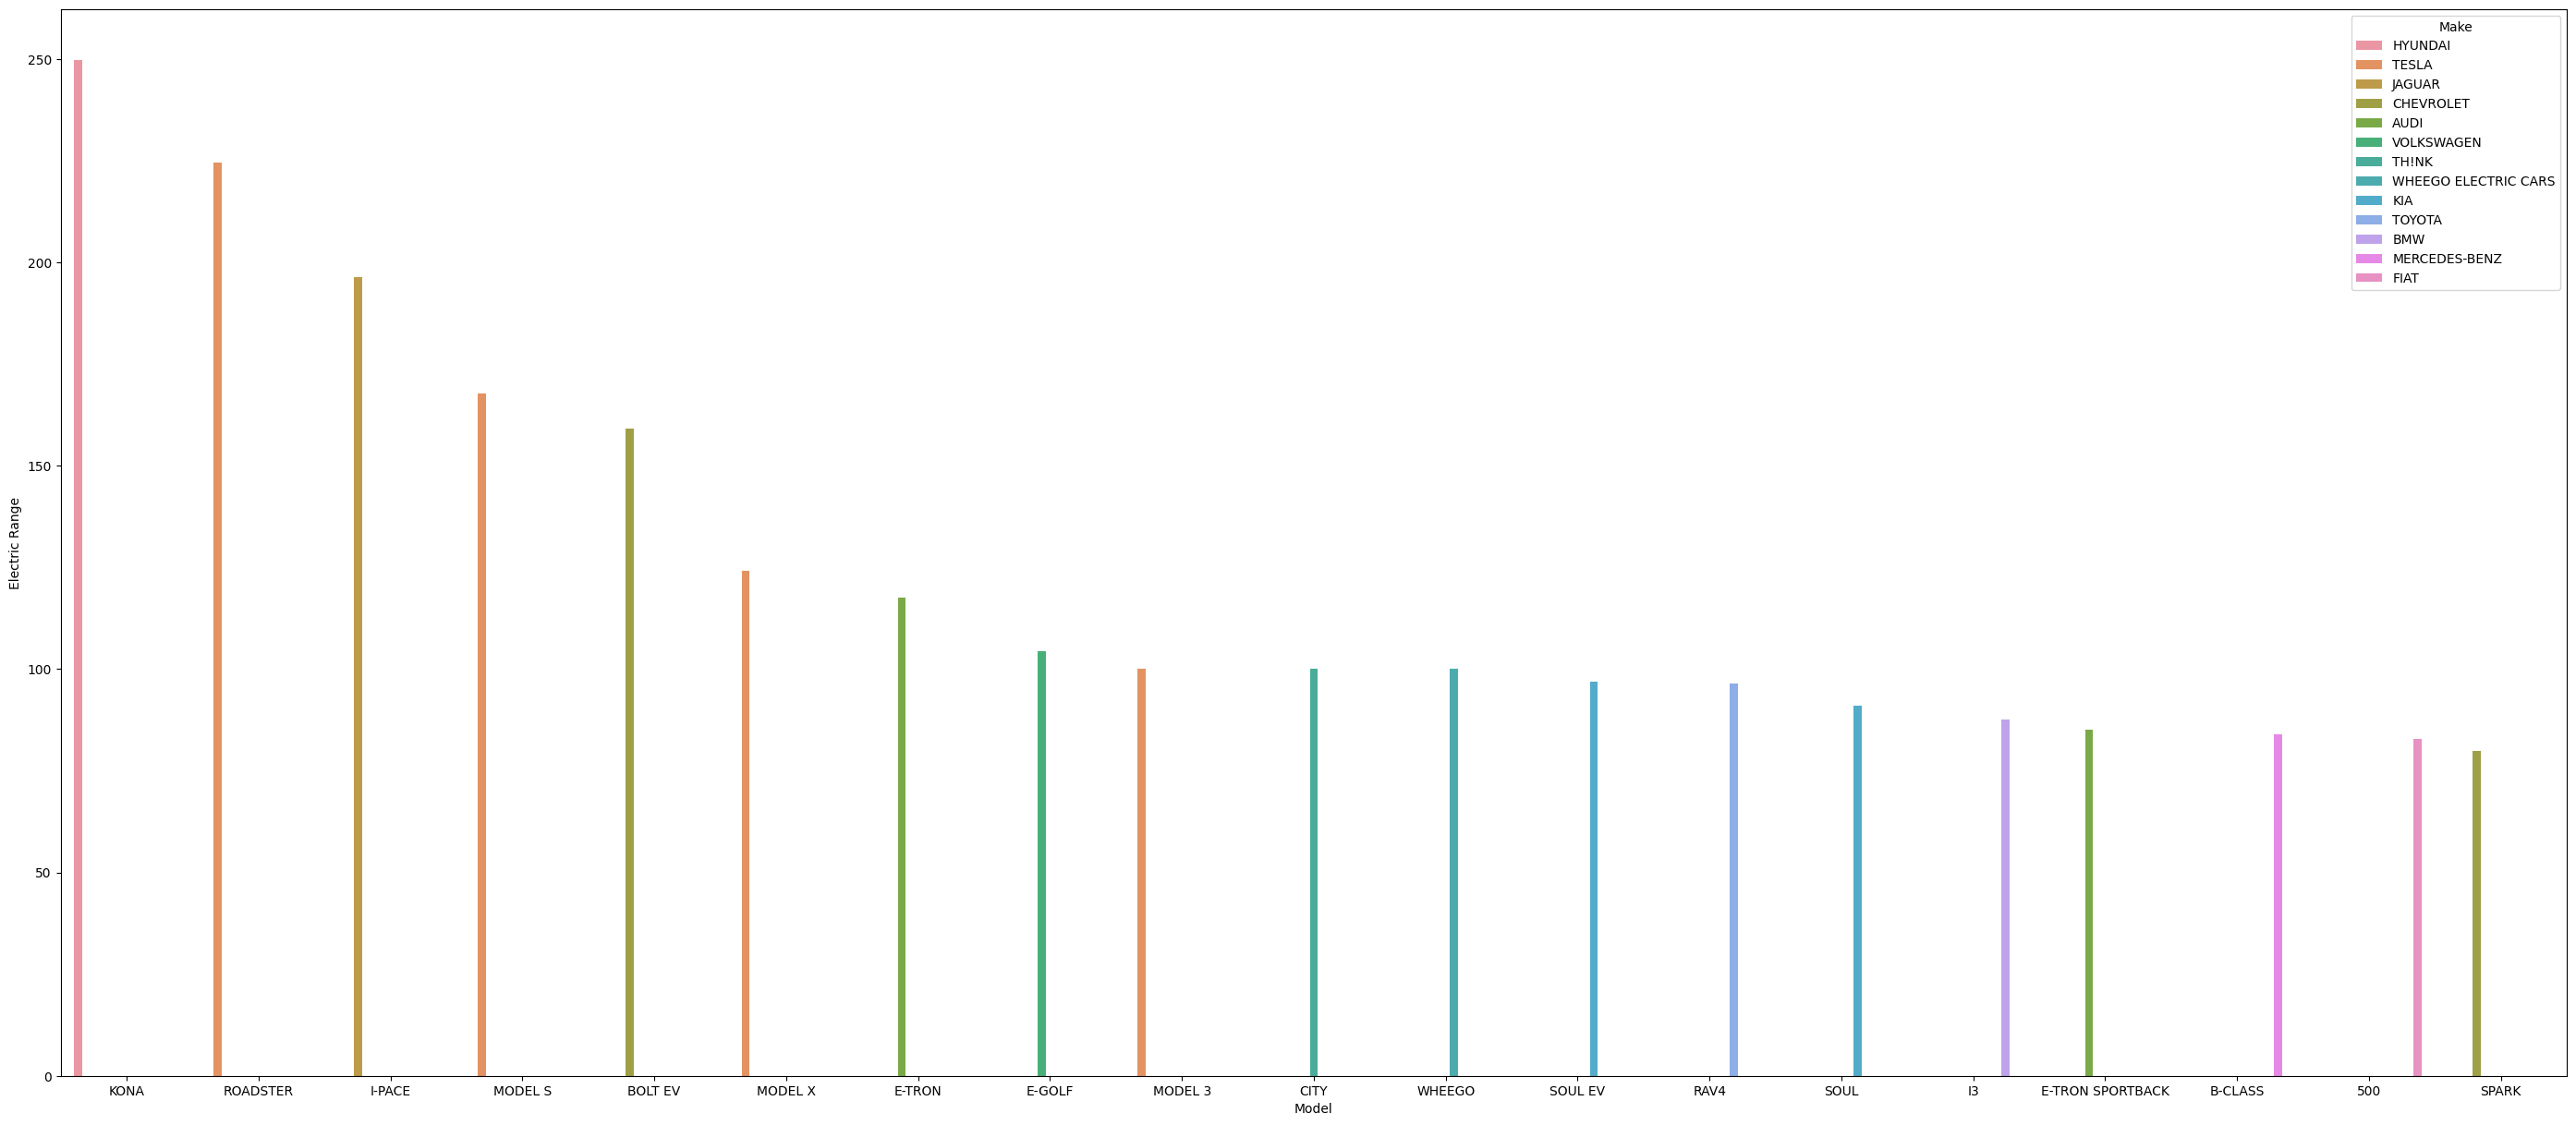

In [61]:
plt.figure(figsize=(35,15)) 
sns.barplot(data=df_er2,x='Model',y='Electric Range',hue='Make')

Base MSRP'yi (üretici tarafından önerilen başlangıç satış fiyatı)hem marka hem model bazında incelediğimizde sırasıyla 103.489 ile Tesla'nın Roadster modeli,94.153 ile Fisker'in Karma'sı,86.948 ile BMW'nin 740E'sinin en yüksek olduğunu görüyoruz.

In [62]:
df_bm=dfr.groupby(by=['Make','Model'])['Base MSRP'].mean().to_frame().reset_index().sort_values(by='Base MSRP',ascending=False)
df_bm

,Make,Model,Base MSRP
133,TESLA,ROADSTER,103489.361702
47,FISKER,KARMA,94153.846154
19,BMW,740E,86948.148148
32,CADILLAC,CT6,75095.000000
18,BMW,530E,35467.695962
...,...,...,...
55,FORD,RANGER,0.000000
56,FORD,TRANSIT,0.000000
57,GENESIS,G80,0.000000
58,GENESIS,GV60,0.000000


Çok fazla kırılım olduğu için görselleştirmeyi kolaylaştırmak için oluşturduğum veri setinin ilk 20 verisini alıp görselleştiriyorum.

In [63]:
df_bm2 = df_bm.iloc[:19,:]  
print(df_bm2)

                     Make       Model      Base MSRP
133                 TESLA    ROADSTER  103489.361702
47                 FISKER       KARMA   94153.846154
19                    BMW        740E   86948.148148
32               CADILLAC         CT6   75095.000000
18                    BMW        530E   35467.695962
126                SUBARU   CROSSTREK   33866.129032
150  WHEEGO ELECTRIC CARS      WHEEGO   32995.000000
83                    KIA     SOUL EV   31247.115385
82                    KIA        SOUL   29479.200000
108                  MINI  COUNTRYMAN   25771.359223
17                    BMW        330E   16560.493827
116               PORSCHE    PANAMERA   13969.696970
130                 TESLA     MODEL S   12601.204346
148                 VOLVO        XC60    8372.071373
115               PORSCHE     CAYENNE    4336.898396
149                 VOLVO        XC90    3305.323944
43               CHRYSLER    PACIFICA    1236.623271
30                    BMW          X5     200.

Barchar ile de görüntülediğimşzde Base MSRP'si sırasıyla en yüksek olan değerlerin Tesla'nın Roadter, Fisker'in Karma'sı,BMW'NİN 740E'si olduğunu görüyoruz.

<Axes: xlabel='Model', ylabel='Base MSRP'>

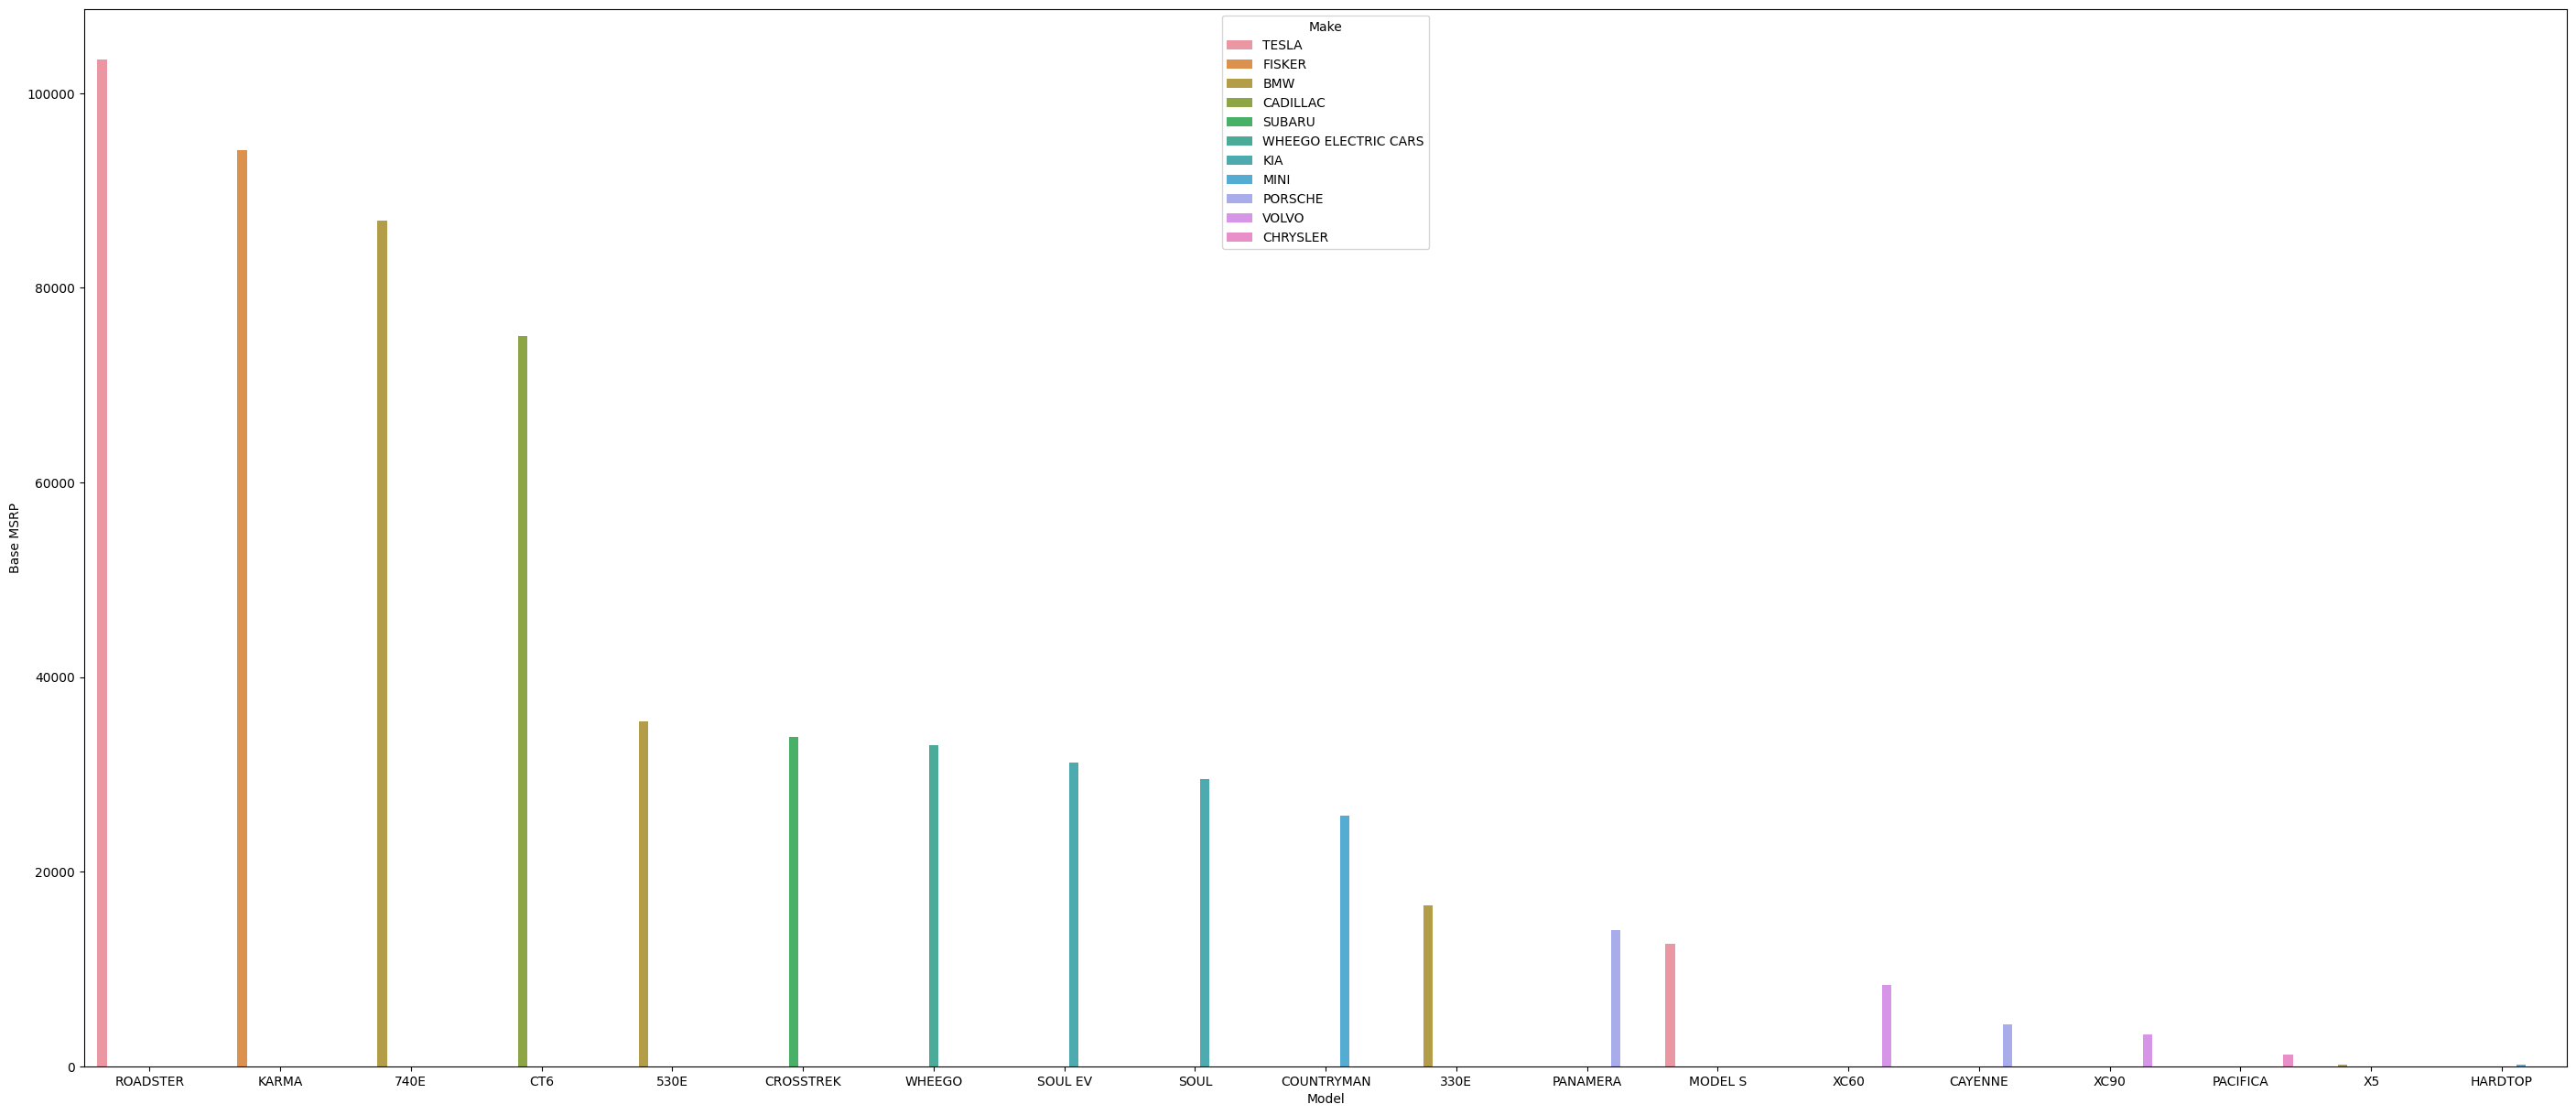

In [64]:
plt.figure(figsize=(35,15)) 
sns.barplot(data=df_bm2,x='Model',y='Base MSRP',hue='Make')

Elektrikli araçların üretim yıllarını 3 segment halinde görebileceğimiz yeni bir kolon oluşturuyorum.model_year_segment kolonu altında 2000 yılından önce üretilen araçlar 2000 yılı öncesi, 2000-2020 yılları arasında üretilen araçlar 2000-2020 arası, 2020 ve sonrasında üretilen araçlar ise 2020 ve sonrası şeklinde görünecektir.

In [65]:
def model_year_segment(Model_Year):
    if Model_Year <2000:
        return '2000 yılı öncesi'
    elif 2000<=Model_Year <2020:
        return '2000-2020 arası'
    else:
        return '2020 ve sonrası'

df_['model_year_segment']=df_['Model Year'].apply(model_year_segment)
df_.head()
        
    


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,model_year_segment
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023.0,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.0,0.0,35.0,240684006.0,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,53035091301.0,2020 ve sonrası
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811.0,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,53035080700.0,2000-2020 arası
2,5YJ3E1EA4L,King,Seattle,WA,98115.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017.0,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007302.0,2020 ve sonrası
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713.0,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000700.0,2000-2020 arası
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,238.0,0.0,20.0,NaN,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,53067012510.0,2000-2020 arası


Elektrik araçların model yıl segmentlerine göre elektrik menzil değerlerini boxplot ile görüntülüyorum. 2000 yılı öncesi ve 2020 ve sonrası araçların aykırı değerler içerdiğini,2000-2020 model araçların ortalama olarak elektrik menzillerinin 100'e yakın, min değerinin 0 max değerinin ise 300'e yakın olduğunu görüyorum. Bu aralıkta verilerim herhangi bir aykırı değer içermemektedir. 

<Axes: xlabel='model_year_segment', ylabel='Electric Range'>

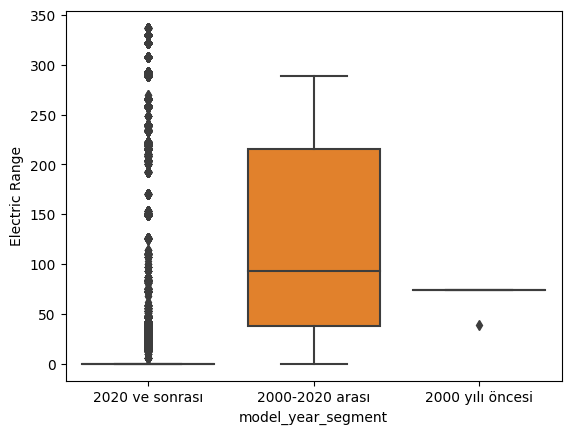

In [66]:
sns.boxplot(data=df_,x='model_year_segment',y='Electric Range')

Elektrik araçların CAFV Eligibility'e göre elektrik menzil değerlerini boxplot ile görüntülüyorum. Batarya menzili araştırılmamış araçların elektrik menzillerinin aykırı değerler içerdiğini görüyorum.Düşük batarya menziline sahip araçların da elektrik menzillerinin 0 ile 50 arasında düşük ve dar bir aralıkta toplandığını ve min değerinin altında birkaç aykırı değere sahip olduğunu  görüyorum.Temiz alternatif yakıt uygunluğu olan araçların elektrik menzilinin 100-150 arasında ortalama bir değere sahip olduğunu,min değerinin 0, max değerinin 300-350 arasında olduğunu görüyorum.

<Axes: xlabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility', ylabel='Electric Range'>

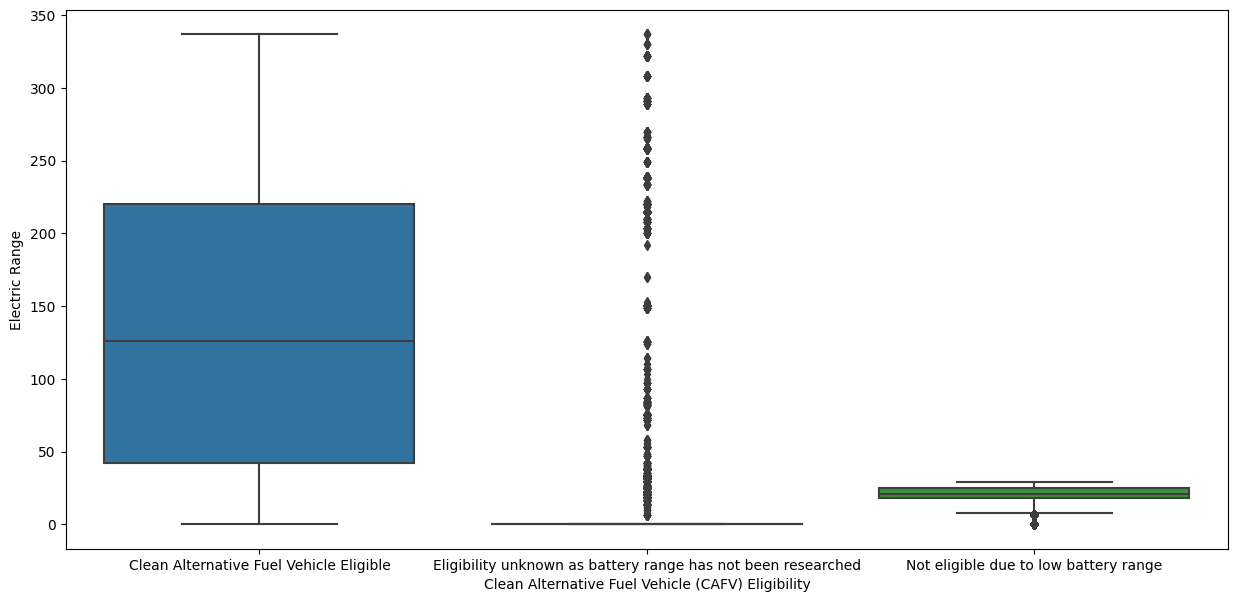

In [67]:
plt.figure(figsize=(15,7)) 
sns.boxplot(data=df_,x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Electric Range')

Isı haritası ile nümerik değişkenlerimin arasında bir ilişki olup olmadığını inceliyorum ve anlamlı bir ilişki olmadığını görüyorum.

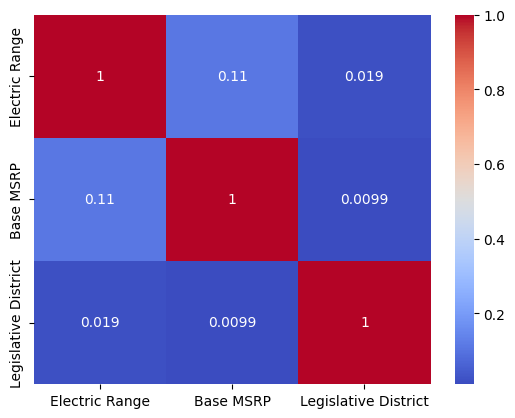

In [68]:
sns.heatmap(df_[['Electric Range','Base MSRP','Legislative District']].corr(),annot=True,cmap='coolwarm');